In [23]:
import lightgbm as lgb
import sklearn 
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.cross_validation import train_test_split
%matplotlib inline

In [4]:
lgb.__version__, sklearn.__version__

('2.1.2', '0.19.1')

# Import digit dataset from sklearn

In [8]:
digits = datasets.load_digits()

In [9]:
print(digits.data)  

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [28]:
data = digits.data
target = digits.target

In [18]:
sample = data[0]

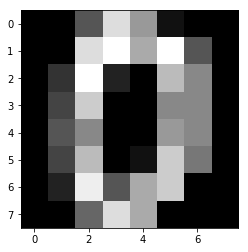

In [21]:
plt.imshow(sample.reshape(8,8),cmap='gray')

# Spliting training/validation dataset

In [38]:
x_train, x_valid , y_train, y_valid = train_test_split(data, target, random_state=42)

In [32]:
# Create dataset
train = lgb.Dataset(x_train, y_train)
valid = lgb.Dataset(x_valid, y_valid, reference=train)

I have struggle to find an easy way to monitor losses per iteration as the documentation is not very intuitive. The idea is to create a dataset, and __passing both training and validation set__ to evaluation. __However LightGBM will use both dataset for validation which is not our purpose, we want validation on validation set only.__ You will need to pass an extra parameter to `reference = train` to let LightGBM know that it should not validation on it.

You also need to create a dictionary and pass it to `evals_result`, which will save the training and validation losses during training

In [79]:
# Create Model
params = {
    'objective': 'multiclass',
    'num_class': 10,
    'learning_rates': 0.5,
    'min_leaves': 1,
    'max_depth': 20
#     'metrics':
}
evals_result = {}
model = lgb.train(params, train_set=train, valid_sets=(train, valid), num_boost_round=100,\
                  evals_result=evals_result, early_stopping_rounds=20)

[1]	training's multi_logloss: 1.92506	valid_1's multi_logloss: 1.95689
Training until validation scores don't improve for 20 rounds.
[2]	training's multi_logloss: 1.67237	valid_1's multi_logloss: 1.72181
[3]	training's multi_logloss: 1.47891	valid_1's multi_logloss: 1.54083
[4]	training's multi_logloss: 1.32428	valid_1's multi_logloss: 1.39754
[5]	training's multi_logloss: 1.19256	valid_1's multi_logloss: 1.27804
[6]	training's multi_logloss: 1.08059	valid_1's multi_logloss: 1.17519
[7]	training's multi_logloss: 0.981159	valid_1's multi_logloss: 1.08167
[8]	training's multi_logloss: 0.893872	valid_1's multi_logloss: 1.00065
[9]	training's multi_logloss: 0.816176	valid_1's multi_logloss: 0.929716
[10]	training's multi_logloss: 0.747609	valid_1's multi_logloss: 0.866767
[11]	training's multi_logloss: 0.686078	valid_1's multi_logloss: 0.809185
[12]	training's multi_logloss: 0.629674	valid_1's multi_logloss: 0.755969
[13]	training's multi_logloss: 0.57963	valid_1's multi_logloss: 0.710794


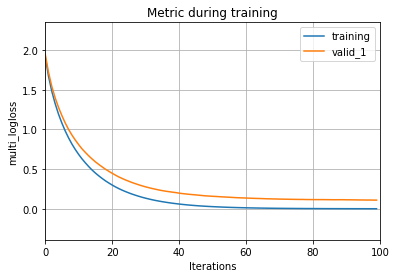

In [80]:
lgb.plot_metric(evals_result, metric='multi_logloss')